In [2]:
import numpy as np
import matplotlib.pyplot as plt

### K Nearest Neighbor

In [177]:
class KNN():

    def __init__(self):
        self.labels=[]
        self.num_clusters=[]
        self.centroids=[]

    @staticmethod
    def distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2, axis=1))

    @staticmethod
    def compute_centroids(X, y):
        labels = np.unique(y).astype(np.int16)
        num_clusters = np.unique(y).shape[0]
        centroids = np.zeros((num_clusters, X.shape[1]))
        for k in range(num_clusters):
            ind, _ = np.where(y==labels[k])
            centroid = np.mean(X[ind, :], axis=0)
            centroids[k,:] = centroid   
        return centroids

    def distance_from_group(self, x):
        mean_distance = np.zeros((len(self.labels), 1))
        for i, label in enumerate(self.labels.tolist()):
            label_index = np.where(self.y == label)
            X_i = self.X[label_index,:]
            distance = self.distance(X_i, x)
            mean_distance[i] = np.mean(distance)
        return mean_distance

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.labels = np.unique(y).astype(np.int16)
        self.num_clusters = np.unique(y).shape[0]
        self.centroids = self.compute_centroids(X, y)
        
    def predict(self, x):
        mean_distance = self.distance_from_group(x)
        return self.labels[np.argmin(mean_distance)]
    
    

## Sample dataset

In [178]:
x1 = np.random.rand(100,2) + np.array([-1, -1])
x2 = np.random.rand(100,2) + np.array([1, 1])
x3 = np.random.rand(100,2) + np.array([1, -1])
x4 = np.random.rand(100,2) + np.array([-1, 1])
y1 = np.ones((100,1)) -1
y2 = np.ones((100,1))
y3 = np.ones((100,1)) + 1
y4 = np.ones((100,1)) + 2
X = np.concatenate([x1, x2, x3, x4], axis=0)
Y = np.concatenate([y1, y2, y3, y4], axis=0)


x test = [0.5, 0.8]
y predicted = 1


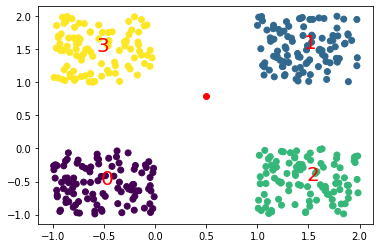

In [181]:
knn = KNN()
knn.fit(X, Y)

rand_index = np.random.choice(X.shape[0],10)
x_test = X[300,:]
x_test = [0.5, 0.8]
y_pred = knn.predict(x_test)
print(f'x test = {x_test}')
print(f'y predicted = {y_pred}')

fig = plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(x_test[0],x_test[1], c="red")

for i in range(knn.num_clusters):
    plt.text(knn.centroids[i,0], knn.centroids[i,1], str(knn.labels[i]), fontdict=dict(color='red', alpha=1, size=20))

